In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

import scanpy as sc

In [2]:
adata = sc.read('brain_downsampled5000_integrated.h5ad')
groups = adata.obs.groupby('dataset').indices
ZE = adata[groups['Zeisel']]
X = pd.DataFrame(data = ZE.X, index = ZE.obs_names, columns=ZE.var_names)
Y = pd.DataFrame(data = ZE.obs['original2'].values)[0]
print("shape of data: ", X.shape)
print("shape of labels: ", Y.shape)

shape of data:  (85621, 2000)
shape of labels:  (85621,)


In [3]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(85621, 11)
shape of train set:  (68496, 2000)  and labels:  (68496, 11) 

shape of test set:  (17125, 2000)  and labels:  (17125, 11) 

Shape of train and validation set to check for overfitting
shape of train set:  (61646, 2000)  and labels:  (61646, 11) 

shape of validation set:  (6850, 2000)  and labels:  (6850, 11)


## Linear SVM performance

shape of labels in training set:  (68496,)
shape of labels in test set:  (17125,)


/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training time: 164.3594708442688
Predict time: 1.1029179096221924
Accuracy of test set:  0.9941021897810219
F1-score of test set:  0.9941605734435789
Precision of test set: 0.9942440703971731
Recall of test set: 0.9941021897810219
Classification report of test set:
                         precision    recall  f1-score   support

      Astrocyte-Zeisel       0.98      0.98      0.98      1175
  Bergmann-glia-Zeisel       0.68      0.72      0.70        53
      Ependymal-Zeisel       1.00      0.99      0.99       274
         Immune-Zeisel       1.00      1.00      1.00      1406
Neurons,Cycling-Zeisel       0.92      0.92      0.92       167
        Neurons-Zeisel       1.00      1.00      1.00     10014
            OEC-Zeisel       0.98      0.99      0.99       395
 Oligos,Cycling-Zeisel       0.73      0.86      0.79        28
         Oligos-Zeisel       1.00      0.99      0.99      1136
            Ttr-Zeisel       0.99      1.00      0.99        91
       Vascular-Zeisel      

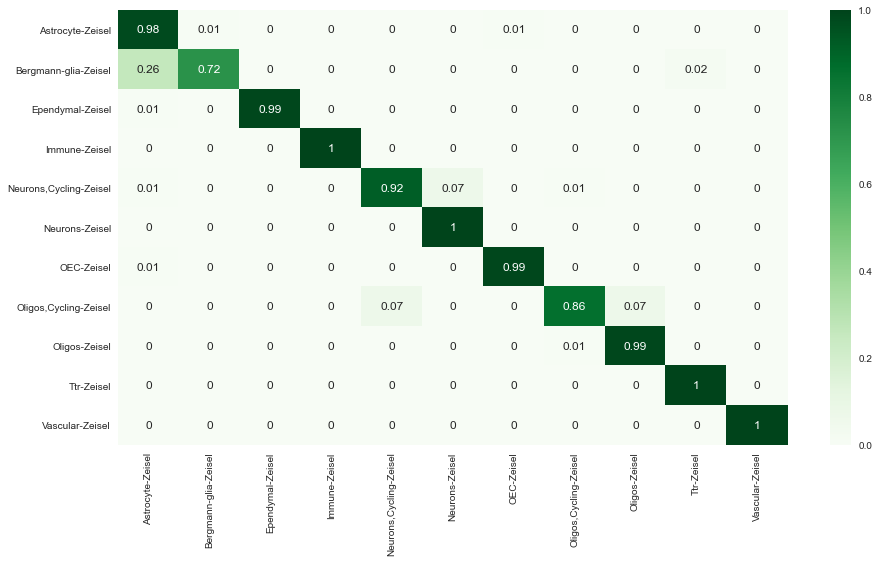

In [4]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## MLP performance

Train the model to check for overfitting


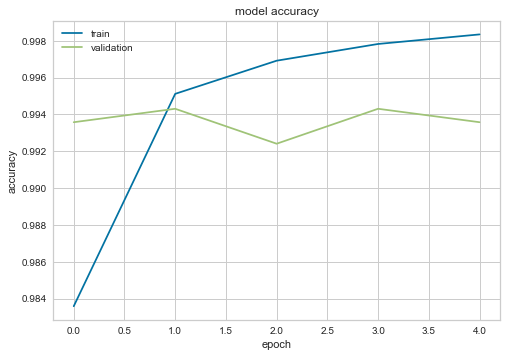

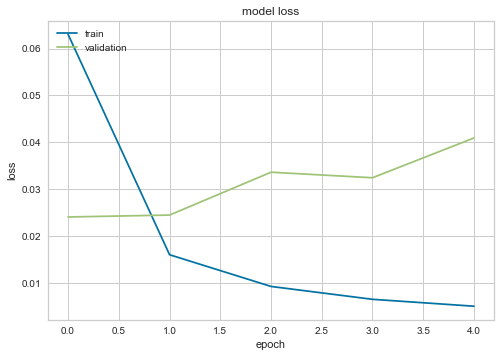

train the final model
Epoch 1/5
2141/2141 [==============================] - 19s 9ms/step - loss: 0.0062 - accuracy: 0.9985
Epoch 2/5
2141/2141 [==============================] - 17s 8ms/step - loss: 0.0032 - accuracy: 0.9990
Epoch 3/5
2141/2141 [==============================] - 17s 8ms/step - loss: 0.0021 - accuracy: 0.9993
Epoch 4/5
2141/2141 [==============================] - 17s 8ms/step - loss: 0.0015 - accuracy: 0.9994
Epoch 5/5
2141/2141 [==============================] - 18s 9ms/step - loss: 0.0011 - accuracy: 0.9996
Training time: 91.49728608131409
Predict time: 1.4950718879699707
The results are as follows:
Accuracy of test set:  0.9952700729927008
F1-score of test set:  0.9952731749784084
Precision of test set: 0.9953687760600438
Recall of test set: 0.9952700729927008
Classification report of test set:
                         precision    recall  f1-score   support

      Astrocyte-Zeisel       0.98      0.99      0.99      1175
  Bergmann-glia-Zeisel       0.91      0.74 

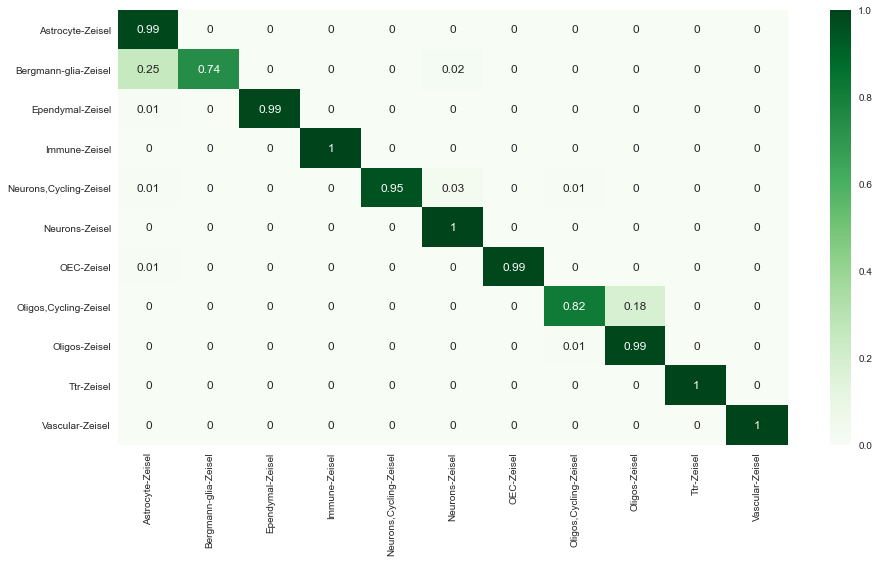

In [5]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


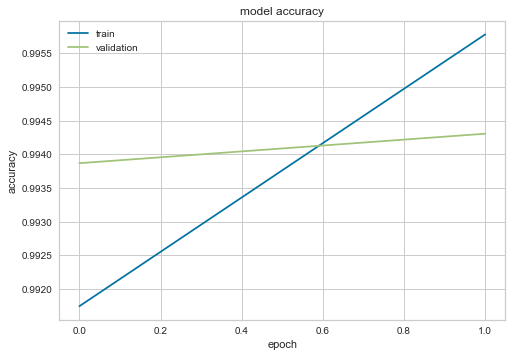

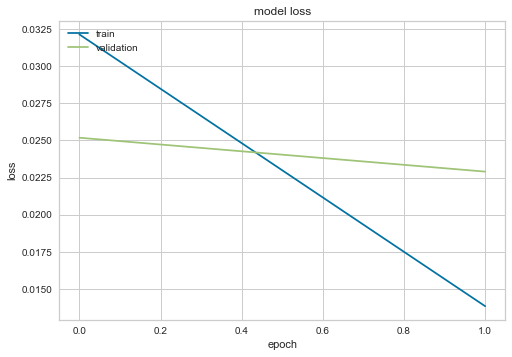

train the final model
Epoch 1/2
2141/2141 [==============================] - 331s 154ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 2/2
2141/2141 [==============================] - 354s 165ms/step - loss: 0.0052 - accuracy: 0.9983
Training time: 689.1718971729279
Predict time: 13.888499021530151
The results are as follows:
Accuracy of test set:  0.9956204379562044
F1-score of test set:  0.9956108833147873
Precision of test set: 0.9956356583883472
Recall of test set: 0.9956204379562044
Classification report of test set:
                         precision    recall  f1-score   support

      Astrocyte-Zeisel       0.98      0.99      0.99      1175
  Bergmann-glia-Zeisel       0.85      0.75      0.80        53
      Ependymal-Zeisel       1.00      0.99      0.99       274
         Immune-Zeisel       1.00      1.00      1.00      1406
Neurons,Cycling-Zeisel       0.93      0.93      0.93       167
        Neurons-Zeisel       1.00      1.00      1.00     10014
            OEC-Zeisel  

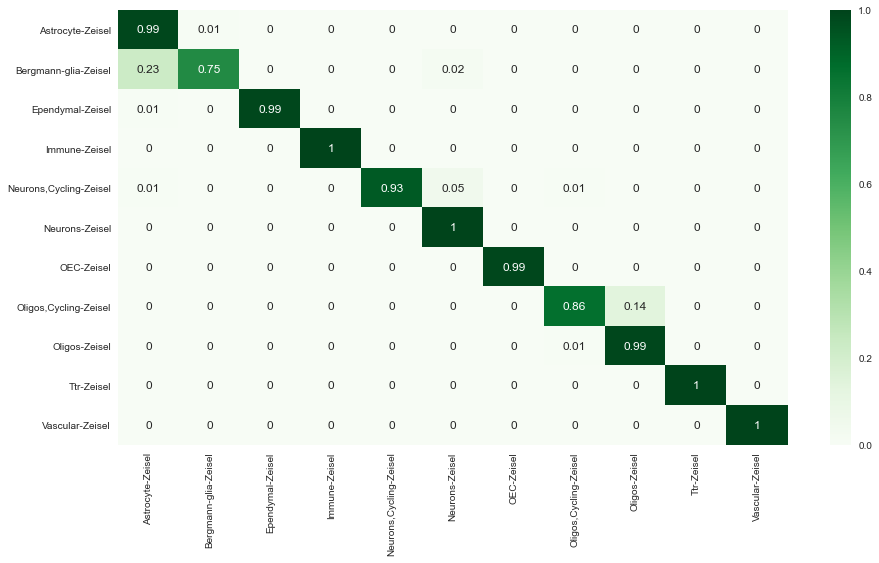

In [6]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)